In [62]:
# %pip install preprocessor
# %pip install pip install preprocess
# pip install preprocessor
import nltk
nltk.download('stopwords')
# import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asabeneh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asabeneh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asabeneh\AppData\Roaming\nltk_data...


True

In [103]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import preprocessor as p
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
import re
sns.set()

In [104]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 5
page_size = 1000

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    # Collect HTML data from this page
    response = requests.get(url)
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 3000 total reviews
Scraping page 4
   ---> 3890 total reviews
Scraping page 5
   ---> 3890 total reviews


In [105]:
# reviews

In [106]:
len(reviews)

3890

In [107]:
df = pd.DataFrame(reviews, columns =['reviews'])

In [108]:
df.to_csv('BA_reviews.csv')

In [109]:
df = pd.read_csv('./BA_reviews.csv')

In [110]:
df

,Unnamed: 0,reviews
0,0,"✅ Trip Verified | Disappointing service, pla..."
1,1,✅ Trip Verified | A transit visa is required...
2,2,✅ Trip Verified | I was surprised to receive...
3,3,"✅ Trip Verified | Flight cancelled, not refu..."
4,4,"✅ Trip Verified | I had visa issues, and hen..."
...,...,...
3885,3885,Flew return in CW from LHR to BKK in August 20...
3886,3886,LHR to HAM. Purser addresses all club passenge...
3887,3887,My son who had worked for British Airways urge...
3888,3888,London City-New York JFK via Shannon on A318 b...


In [111]:
def clean_text (txt):
    pattern = r'[^\w\s]'
    if txt.startswith('✅ Trip Verified | '):
        txt = txt[16:]
    elif txt.startswith('Not Verified | '):
        txt = txt[15:]
    else:
        pass
    cleaned_text = re.sub(pattern, ' ', txt)
    return cleaned_text.lower()

In [112]:
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

In [113]:
df

,Unnamed: 0,reviews,cleaned_reviews
0,0,"✅ Trip Verified | Disappointing service, pla...",disappointing service plane interior and ...
1,1,✅ Trip Verified | A transit visa is required...,a transit visa is required for my partner ...
2,2,✅ Trip Verified | I was surprised to receive...,trip verified i was surprised to receive...
3,3,"✅ Trip Verified | Flight cancelled, not refu...",flight cancelled not refunding our money ...
4,4,"✅ Trip Verified | I had visa issues, and hen...",i had visa issues and hence was debarred...
...,...,...,...
3885,3885,Flew return in CW from LHR to BKK in August 20...,flew return in cw from lhr to bkk in august 20...
3886,3886,LHR to HAM. Purser addresses all club passenge...,lhr to ham purser addresses all club passenge...
3887,3887,My son who had worked for British Airways urge...,my son who had worked for british airways urge...
3888,3888,London City-New York JFK via Shannon on A318 b...,london city new york jfk via shannon on a318 b...


In [114]:
df

,Unnamed: 0,reviews,cleaned_reviews
0,0,"✅ Trip Verified | Disappointing service, pla...",disappointing service plane interior and ...
1,1,✅ Trip Verified | A transit visa is required...,a transit visa is required for my partner ...
2,2,✅ Trip Verified | I was surprised to receive...,trip verified i was surprised to receive...
3,3,"✅ Trip Verified | Flight cancelled, not refu...",flight cancelled not refunding our money ...
4,4,"✅ Trip Verified | I had visa issues, and hen...",i had visa issues and hence was debarred...
...,...,...,...
3885,3885,Flew return in CW from LHR to BKK in August 20...,flew return in cw from lhr to bkk in august 20...
3886,3886,LHR to HAM. Purser addresses all club passenge...,lhr to ham purser addresses all club passenge...
3887,3887,My son who had worked for British Airways urge...,my son who had worked for british airways urge...
3888,3888,London City-New York JFK via Shannon on A318 b...,london city new york jfk via shannon on a318 b...


In [115]:
stop_words = stopwords.words('english')

In [116]:
print(stop_words,len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [117]:
def sentiment_analyzer(review):
    sentiment= TextBlob(review)
    score= sentiment.sentiment.polarity
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

In [118]:
data = df

In [119]:
def filter_words(reviews):
    filtered = []
    for review in reviews:
        tokens = word_tokenize(review)
        for word in tokens:
            if word not in stop_words and word.isalpha():
                    filtered.append(word)
    return filtered
print(filter_words(df['cleaned_reviews'][:3]))

reviews=[]
for i in df['cleaned_reviews']:
    reviews.append(i)

['disappointing', 'service', 'plane', 'interior', 'terribly', 'incompetent', 'customer', 'service', 'booked', 'flight', 'directly', 'ba', 'website', 'soon', 'started', 'get', 'emails', 'saying', 'selected', 'seats', 'paid', 'extra', 'selection', 'changed', 'ba', 'without', 'reason', 'given', 'directed', 'website', 'found', 'information', 'said', 'seat', 'change', 'happened', 'several', 'times', 'flights', 'altogether', 'website', 'seems', 'digital', 'dinosaur', 'first', 'leg', 'flight', 'fine', 'discovered', 'transfer', 'area', 'heathrow', 'forgot', 'new', 'laptop', 'onboard', 'immediately', 'contacted', 'ba', 'called', 'customer', 'service', 'oxymoron', 'basically', 'said', 'anything', 'would', 'wait', 'cleaners', 'working', 'contractor', 'would', 'finished', 'job', 'hope', 'would', 'discover', 'laptop', 'return', 'called', 'lost', 'found', 'airport', 'ba', 'customer', 'service', 'said', 'contact', 'colleagues', 'terminal', 'gate', 'plane', 'still', 'let', 'know', 'lost', 'laptop', 's

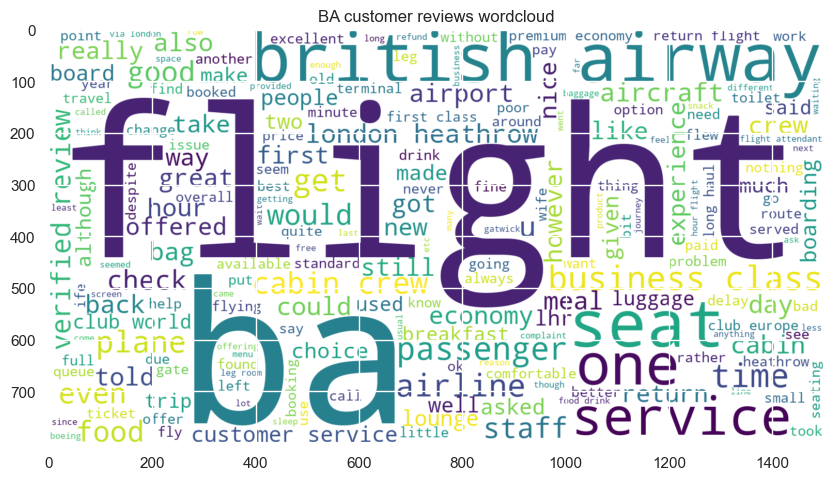

In [133]:
def plot_wordcloud(review,title):
    words_filtered = filter_words(review)
    text = " ".join([word for word in words_filtered])
    word_cloud= WordCloud(
        background_color="white",
        random_state=1,
        stopwords=stop_words,width = 1500, height = 800,)
    word_cloud.generate(text)
    plt.figure(figsize=[10,10])
    plt.imshow(word_cloud,interpolation="bilinear")
    # plt.axis('off')
    plt.title(title)
    image_name = f'{title.lower().replace(" ", "_")}.png'
    plt.savefig(image_name)
    plt.show()

plot_wordcloud(reviews, 'BA customer reviews wordcloud')

In [121]:
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in word_tokenize(text)]
df['tokenized_reviews'] = df['cleaned_reviews'].apply(lemmatize_text)
df['tokenized_reviews'] = df['tokenized_reviews'].apply(lambda x: [item for item in x if item not in stop_words])
df['tokenized_reviews'] = df['tokenized_reviews'].apply(lambda x: ' '.join(x))

In [122]:
df

,Unnamed: 0,reviews,cleaned_reviews,tokenized_reviews
0,0,"✅ Trip Verified | Disappointing service, pla...",disappointing service plane interior and ...,disappointing service plane interior terribly ...
1,1,✅ Trip Verified | A transit visa is required...,a transit visa is required for my partner ...,transit visa required partner transit via lond...
2,2,✅ Trip Verified | I was surprised to receive...,trip verified i was surprised to receive...,trip verified wa surprised receive confirmatio...
3,3,"✅ Trip Verified | Flight cancelled, not refu...",flight cancelled not refunding our money ...,flight cancelled refunding money saying took f...
4,4,"✅ Trip Verified | I had visa issues, and hen...",i had visa issues and hence was debarred...,visa issue hence wa debarred flying ground sta...
...,...,...,...,...
3885,3885,Flew return in CW from LHR to BKK in August 20...,flew return in cw from lhr to bkk in august 20...,flew return cw lhr bkk august 2012 positive fl...
3886,3886,LHR to HAM. Purser addresses all club passenge...,lhr to ham purser addresses all club passenge...,lhr ham purser address club passenger name boa...
3887,3887,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,son worked british airway urged fly british ai...
3888,3888,London City-New York JFK via Shannon on A318 b...,london city new york jfk via shannon on a318 b...,london city new york jfk via shannon a318 real...


In [123]:
def sentiment_analyzer(review):
    sentiment= TextBlob(review)
    score= sentiment.sentiment.polarity
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

In [124]:
df['sentiment'] = df['tokenized_reviews'].apply(sentiment_analyzer)

In [126]:
s = df['sentiment'].value_counts().sort_values(ascending=False)

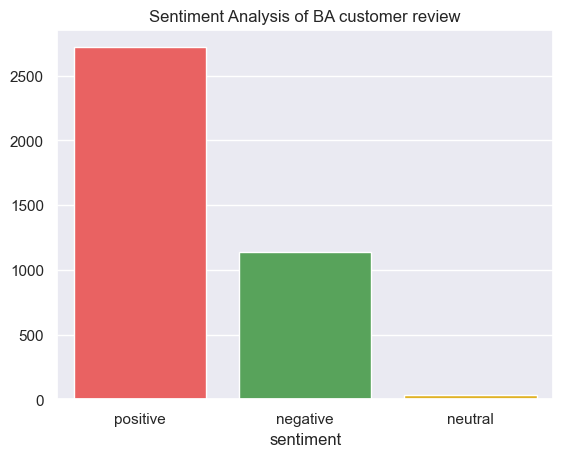

In [130]:
color_palette=['#FF4C4C',"#4CAF50", '#FFC107']
sns.barplot(x = s.index, y = s.values, order = s.index, palette=color_palette)
title = 'Sentiment Analysis of BA customer review'
plt.title(title)
image_name = f'{title.lower().replace(" ", "_")}.png'
plt.savefig(image_name)

## References
https://medium.com/@qudrohbidemi/sentiment-analysis-project-using-textblob-216d3fe119fc